In [ ]:
#!pip install -r requirements_1.5.txt
#jupyter lab --NotebookApp.iopub_data_rate_limit=10000000

# Import libraries libraries

In [1]:
# Libraries - Natural Language Toolkit (NLTK), TextBlob, and SpaCy
from textblob import TextBlob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import nltk
import re

from collections import Counter
sns.set()

#Ensure necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

np.Inf = np.inf

[nltk_data] Downloading package stopwords to /Users/aya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
myfile = open('20th_century.txt', encoding='utf-8') 

In [3]:
myfile

<_io.TextIOWrapper name='20th_century.txt' mode='r' encoding='utf-8'>

In [4]:
#Import txt file (20th_century.txt)
with open('20th_century.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [5]:
#Sentence tokenization
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914–1918)         1.1.2 Russian Revolution and communism           1.2 Between the wars       1.2.1 Economic depression         1.2.2 The rise o

In [6]:
# Word tokenization
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.1.2', 'Russian', 'Revolutio

In [7]:
#Create frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4791 samples and 21740 outcomes>


In [8]:
#The most common words - top 10
top10 = dist_words.most_common(10)

In [9]:
top10

[('.', 1571),
 ('the', 1106),
 (',', 963),
 ('of', 615),
 ('and', 401),
 ('to', 326),
 ('The', 319),
 ('[', 300),
 (']', 300),
 ('in', 296)]

In [10]:
print(type(dist_words))

<class 'nltk.probability.FreqDist'>


In [11]:
print(hasattr(dist_words, 'plot'))

True


In [12]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

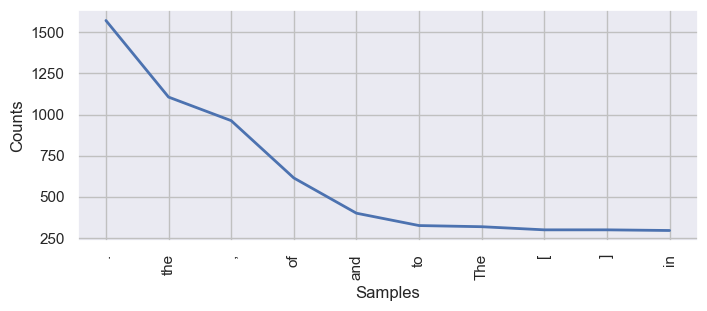

In [13]:
#Plot the Frequency Distribution
plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

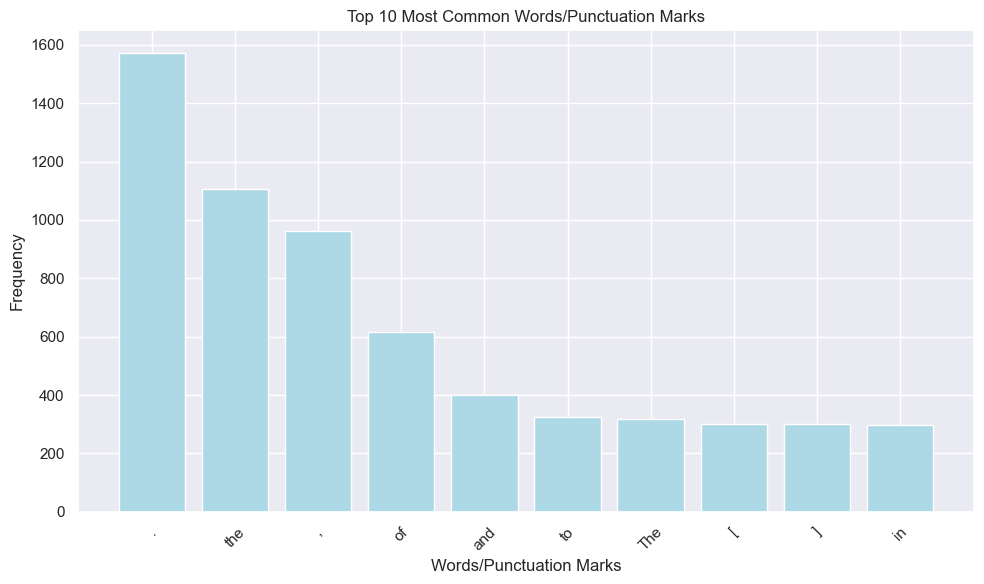

In [14]:
#Create the bar plot 
plt.figure(figsize=(10, 6))
plt.bar([item[0] for item in top10], [item[1] for item in top10], color='lightblue')
plt.xlabel('Words/Punctuation Marks')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words/Punctuation Marks')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

## Stopwords

In [15]:
#Defining stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [16]:
print(stop_words)

{"mightn't", 'who', 'himself', 'their', 'needn', 'will', 'm', 't', "that'll", 'that', 'for', 'than', 'above', 'below', 'its', 'all', 'on', 'then', 's', 'how', 'from', 'about', 'have', 'him', 'or', 'other', 'while', 'down', 'and', 'if', "shan't", 'are', 'these', 'during', 'ours', 'both', 'itself', 'why', 'they', "isn't", 'again', 'i', 'o', "wasn't", "she'll", "hasn't", 'wouldn', "wouldn't", "didn't", 'hers', 'too', 'ourselves', 'most', 'of', 'what', 've', "you're", 'your', "haven't", "mustn't", 'own', 'you', 'each', 'nor', 'a', 'between', 'is', "he'd", 'not', 'whom', 'more', 'were', "won't", 'can', 'hasn', 'weren', 'haven', "it's", 'by', 'very', "couldn't", 'be', "they'll", 'it', "they're", 'd', 'further', "it'd", 'hadn', 'into', 'we', "should've", 'at', 'he', 'herself', 'which', 'll', 'was', "we'd", 'she', 'yourselves', "we've", "hadn't", 'should', 'been', 'once', 'against', "weren't", 'so', 'but', 'his', 'after', "you'd", 'those', "doesn't", 'no', "don't", 'the', 'only', "i've", 'out'

In [17]:
#Creates an empty list
Filtered_words = []

In [18]:
#Remove stop words in words
for word in tokenized_word:
    if word not in stop_words:
        Filtered_words.append(word)

In [19]:
# Removing stopwords in sentences
# filtered_sent = []
# for word in tokenized_sent:
#     if word not in stop_words:
#         filtered_sent.append(word)
# print("Tokenized Sentence:", tokenized_sent)
# print("Filterd Sentence:", filtered_sent)

In [20]:
#List of fillered words
Filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSpecial',
 'pages',
 'Search',
 'Search',
 'Appearance',
 'Donate',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Donate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Historic',
 'events',
 '20th',
 'century',
 'Toggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection',
 '1.1',
 'World',
 'beginning',
 'century',
 '1.1.1',
 '``',
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914–1918',
 ')',
 '1.1.2',
 'Russian',
 'Revolution',
 'communism',
 '1.2',
 'Between',
 'wars',
 '1.

In [21]:
#Create a new FreqDist for filtered_words
dist_words_filter = FreqDist(Filtered_words)
print(dist_words_filter)

<FreqDist with 4687 samples and 17047 outcomes>


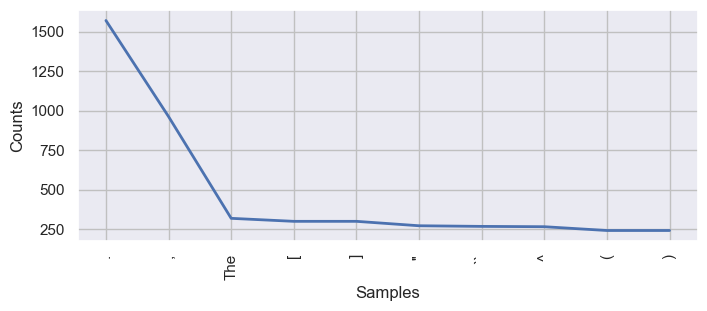

In [22]:
#Frequency Distribution Plot
plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [23]:
#Substitute all punctuation marks with a space
sans_punc = re.sub("[^a-zA-Z]",  #Search for all non-letters
                        " ",     #Replace all non-letters with spaces
                        str(Filtered_words))

In [24]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSpecial    pages    Search    Search    Appearance    Donate    Create    account    Log    Personal    tools    Donate    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    subsection           World    beginning    century                   The    war    end    wars               World    War    I                                    Russian    Revolution    communism           Between    wars             Economic    depression             The    rise    dictatorship           Global   

In [25]:
#Word tokenization
Tokenized_word_2 = word_tokenize(sans_punc)

In [26]:
print(Tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation

In [27]:
#Create a new FreqDist
dist_words_filter_2 = FreqDist(Tokenized_word_2) 

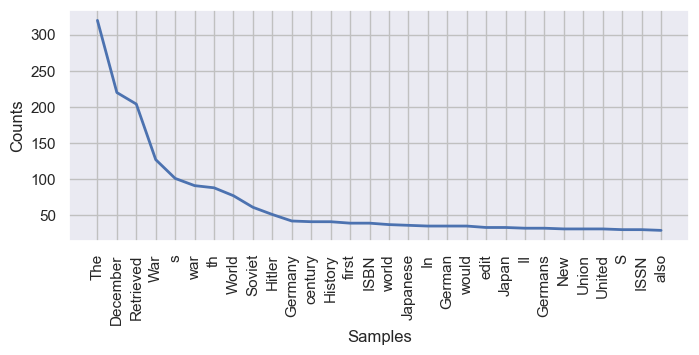

In [28]:
# Frequency Distribution Plot
plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [29]:
#Create the bar plot for top 10 words after removing [stop words and punctuation marks]
top_words_clean = dist_words_filter_2.most_common(10)

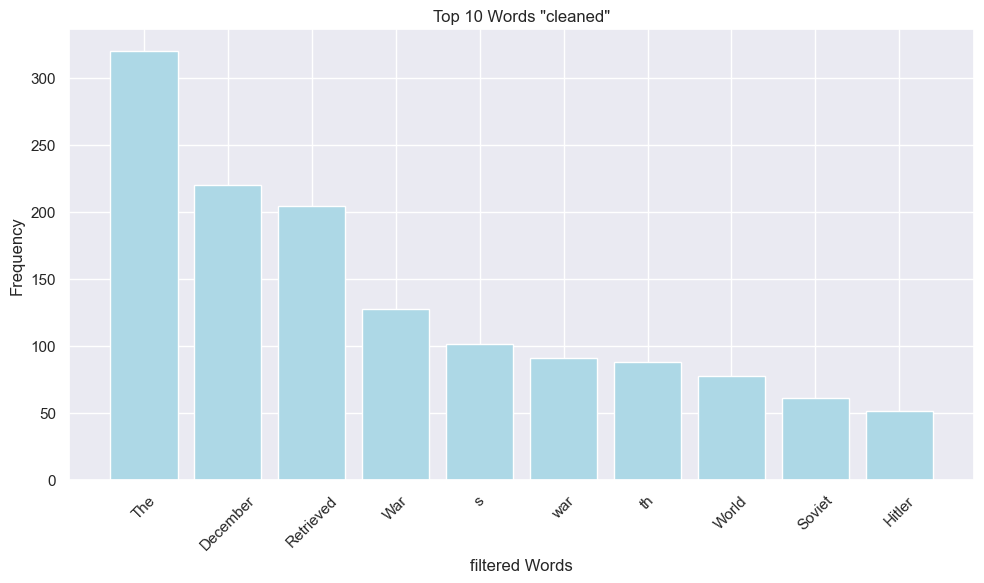

In [30]:
#Create the bar plot 
plt.figure(figsize=(10, 6))
plt.bar([item[0] for item in top_words_clean], [item[1] for item in top_words_clean], color='lightblue')
plt.xlabel('filtered Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words "cleaned"')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

# Observations

- Removing the stop words did not greatly improve the results, as the plots still showed a prevalence of articles and punctuation marks.

- Substituting all punctuation marks with whitespace resulted in a much improved list of words, as shown in the plot.

- While there are still some unnecessary letters and words such as 'The', 'th', and 's', we can identify more meaningful terms among the most common words, such as 'December', 'Retrieved', 'war', 'World', 'Soviet', and 'Hitler'.

- The data still requires further cleaning to remove any residual letters that were once part of a word before punctuation was eliminated.


## POS Tags with TextBlob

In [31]:
#Create a tags list using TextBlob (remove a few more words and letters by adding them to the new_stopwords list)
new_stopwords = ["And", "Then", 'n', 't', 's', 'The', 'th']

In [32]:
#Creat an empty list
filtered = []

In [33]:
#Using the same object, Tokenized_word_2
#remove a few more words and letters by adding them to the new_stopwords list
for word in Tokenized_word_2: 
     if word not in new_stopwords:
        filtered.append(word)

In [34]:
#Create a TextBlob object -first this to do when creating tags
#%%time
text = TextBlob(str(filtered)) #make one big string out of the list filtered and pass this to the TextBlob() function

In [35]:
#Check the object
text

TextBlob("['Key', 'events', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'century', 'Toggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days

In [36]:
#Create an object called tags_list
tags_list = text.tags

In [37]:
#Check the object
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pages", 'NNS'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'accoun

In [38]:
#Store the tags list in a dataframe 
df_text = pd.DataFrame(tags_list)

In [39]:
df_text.columns = [ 'Words', "Word type"]

In [40]:
#Group by Word type
df_t_wordtype = df_text.groupby('Word type').count().reset_index()

In [41]:
df_t_wordtype.value_counts()

Word type  Words
CC         1        1
CD         76       1
DT         12       1
EX         12       1
FW         43       1
IN         155      1
JJ         287      1
JJR        12       1
JJS        60       1
MD         59       1
NN         387      1
NNP        5528     1
NNS        1052     1
POS        6834     1
PRP        33       1
RB         141      1
VBD        851      1
VBG        320      1
VBN        17       1
VBP        9        1
VBZ        79       1
WP         12       1
Name: count, dtype: int64

In [42]:
#Use nlargest from pandas to Pick the largest 10 groups on the list
top10_words = df_t_wordtype.nlargest(10, 'Words')

In [43]:
top10_words.head(3)

,Word type,Words
13,POS,6834
11,NNP,5528
12,NNS,1052


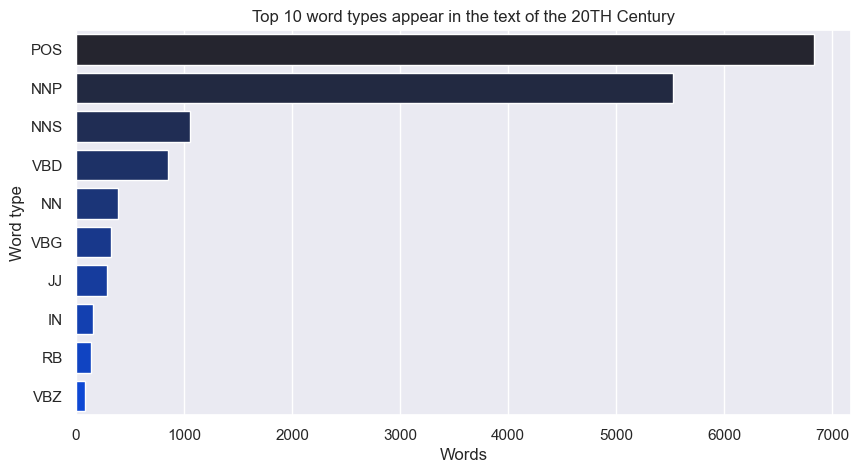

In [44]:
#Create a bar plot using the grouped dataframe -using seaborn
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
 sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top10_words).set_title("Top 10 word types appear in the text of the 20TH Century")

## Nouns, Verbs, and Adjectives

#### Nouns

In [45]:
#The most common nouns - filter the nouns [singular nouns (NN), pluralized nouns (NNS), and proper nouns (NNP)]
df_nouns = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]

In [46]:
#Assign columns to the dataframe
df_nouns.columns = ["Word", "Occurences"]

In [47]:
#Group the dataframe by "word", count the occurrences of each group, and then reset the index of the resulting DataFrame. The reset of the index transforms the grouped "Word" values back into a regular column, making the DataFrame easier to work with.
x_n = df_nouns.groupby('Word').count().reset_index()


In [48]:
#Sort the dataframe "x_n", then assign it to the dataframe y_n
y_n = x_n.sort_values(by = ['Occurences'], ascending=False)

In [49]:
top15_nouns = y_n.nlargest(15, 'Occurences')

In [50]:
top15_nouns

,Word,Occurences
296,'December,220
1269,'War,127
2582,'war,91
1316,'World,77
1115,'Soviet,61
544,'Hitler,51
543,'History,41
1502,'century,41
1785,'first,39
566,'ISBN,39


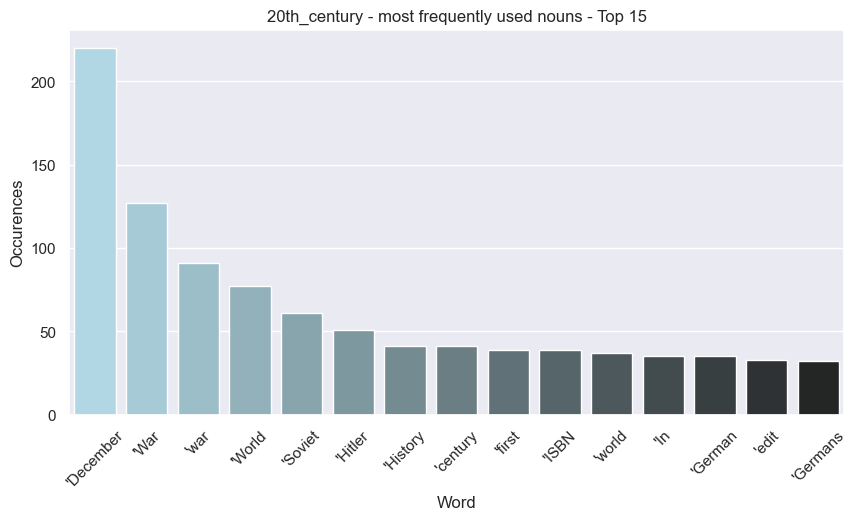

In [51]:
#Create a bar plot for the top 15 Nouns -using seaborn
pal = sns.dark_palette("lightblue", n_colors=len(top15_nouns), reverse=True)
plt.figure(figsize=(10, 5))
# Create the barplot with the customized dark color palette
sns.barplot(
    x="Word", 
    y="Occurences", 
    data=top15_nouns, 
    palette=pal,
    saturation=0.9
).set_title("20th_century - most frequently used nouns - Top 15")
plt.xticks(rotation=45)
plt.show()

#### Verbs

In [52]:
#The most common verbs - filter the verbs [Verbs (VB), Adverbs (VBD)]
df_verbs = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]

In [53]:
#Assign columns to the dataframe
df_verbs.columns = ["Word", "Occurences"]

In [54]:
#Group the dataframe by "word", count the occurrences of each group, and then reset the index of the resulting DataFrame. The reset of the index transforms the grouped "Word" values back into a regular column, making the DataFrame easier to work with.
x_verbs = df_verbs.groupby('Word').count().reset_index()

In [55]:
#Sort the dataframe "x_n", then assign it to the dataframe y_n
y_verbs = x_verbs.sort_values(by = ['Occurences'], ascending=False)

In [56]:
top15_verbs = y_verbs.nlargest(15, 'Occurences')

In [57]:
top15_verbs

,Word,Occurences
26,'Retrieved,204
35,'United,31
0,'Allied,19
193,'led,15
317,'used,13
191,'launched,12
1,'Archived,10
91,'controlled,9
158,'forced,8
300,'surrendered,7


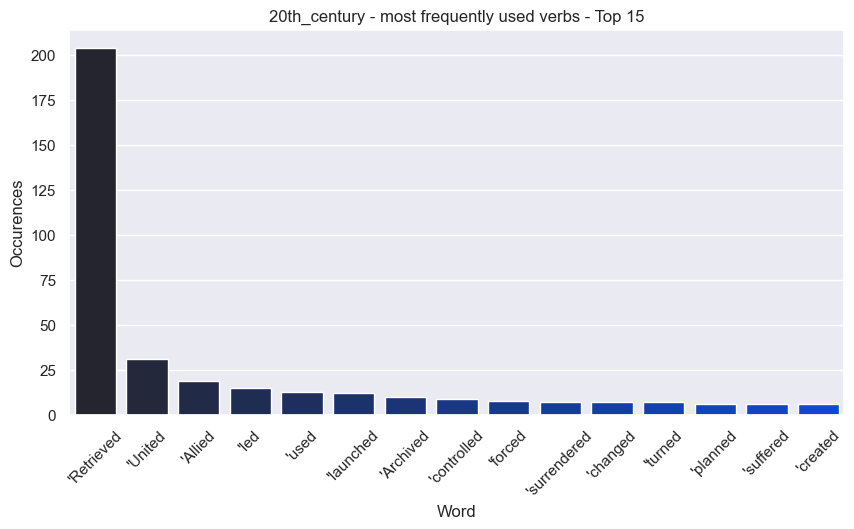

In [58]:
#Create a bar plot for the top 15 Verbs -using seaborn
plt.figure(figsize=(10, 5))
pal_verbs = sns.dark_palette("xkcd:blue", n_colors=15)
sns.barplot(
    x="Word", 
    y="Occurences", 
    data=top15_verbs, 
    palette=pal_verbs,
    saturation=0.9
).set_title("20th_century - most frequently used verbs - Top 15")
plt.xticks(rotation=45)
plt.show()

#### Adjectives

In [59]:
#The most common Adjectives - filter the Adjectives [Adjectives (JJ)]
df_adj = df_text[df_text['Word type'] == "JJ"]

In [60]:
#Assign columns to the dataframe
df_adj.columns = ["Word", "Occurences"]

In [61]:
#Group the dataframe by "word", count the occurrences of each group, and then reset the index of the resulting DataFrame.
x_adj = df_adj.groupby('Word').count().reset_index()

In [62]:
#Sort the dataframe "x_adj", then assign it to the dataframe y_adj
y_adj = x_adj.sort_values(by=['Occurences'], ascending=False)

In [63]:
top15_adj = y_adj.nlargest(10, 'Occurences')

In [64]:
top15_adj

,Word,Occurences
27,'Japanese,36
2,'American,24
5,'Atlantic,13
19,'Guardian,10
13,'Chinese,7
42,'Russian,7
1,'African,6
103,'political,6
104,'possible,5
7,'Baltic,5


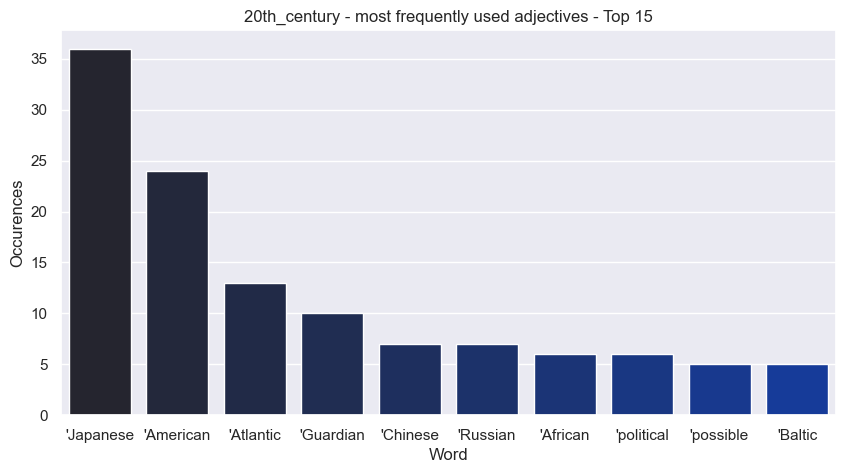

In [65]:
#Create a bar plot for the top 15 Adverbs -using seaborn
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15_adj).set_title("20th_century - most frequently used adjectives - Top 15")

# Observations

- There is some repetition in the nouns, as we see both uppercase and lowercase versions of 'War' and 'war' and World' and 'world' repeated among the most common words.
- This suggests that if we combine the occurrences of 'War' and 'war,' it would become the most common word, surpassing 'December.' War was indeed one of the most significant themes of the 20th century. The bar plot also indicates that many significant events occurred in December during the 20th century. 

- All the words are related to past actions, as shown in the verb bar plot. These words indicate dynamic events or actions that occurred, suggesting common war terminology. They also imply the exertion of power through actions on the ground.

- The Japanease and the Americans are the most involved in the events of the 20th century perhaps, as suggeted by the adjective bar chart. I was expecting to see Russia and Gemrany among the top, though. 

- The Japanese and Americans appear to be the most involved in the events of the 20th century, as suggested by the adjective bar chart. I was expecting to see Russia and Germany among the top as well.

- All the words starts with ( ' ).

## Counting countries occurences

In [100]:
#Convert the filtered object that holds the word tokens in a string 
listToStr = ' '.join([str(elem) for elem in filtered])

In [101]:
print(listToStr)

Key events century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log Personal tools Donate Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events century Toggle Historic events century subsection World beginning century war end wars World War I Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links T

In [102]:
#Using the regular expression W+ inside a Counter() function, and store the results in a dictionary
#Create a count for the the countires
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [103]:
all_counts

Counter({'December': 220,
         'Retrieved': 204,
         'War': 127,
         'war': 91,
         'World': 77,
         'Soviet': 61,
         'Hitler': 51,
         'Germany': 42,
         'century': 41,
         'History': 41,
         'first': 39,
         'ISBN': 39,
         'world': 37,
         'Japanese': 36,
         'In': 35,
         'German': 35,
         'would': 35,
         'edit': 33,
         'Japan': 33,
         'II': 32,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'United': 31,
         'S': 30,
         'ISSN': 30,
         'also': 29,
         'September': 29,
         'Europe': 28,
         'July': 28,
         'became': 28,
         'A': 27,
         'end': 26,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'August': 25,
         'June': 25,
         'Battle': 25,
         'history': 24,
         'American': 24,
         'weapons': 24,
         'October': 24,
         'com': 24,
         'new': 23,
 

In [104]:
#Import the csv file and assing to countries
countries = pd.read_csv("countries_list_20th_century_1.5.csv", index_col = 0)

In [105]:
countries.head()

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola


In [106]:
#Clean the dataframe countries
countries['country_name'] = countries['country_name'].str.strip()

In [107]:
#The column turned into a list 
countries_list = countries['country_name'].to_list()

In [108]:
countries_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'G

In [109]:
#Use the object all_counts to see how the frequencies of the strings - d` represents each country name listed inthe list one at a time
dict_of_counts = {d : all_counts[d] for d in countries_list}

In [110]:
#Check the dict_of_counts
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 1,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [111]:
#Search for the names from the list in the dictionary
dct = {v:[k] for v,k in dict_of_counts.items()}

In [112]:
dct

{'Afghanistan': [1],
 'Albania': [2],
 'Algeria': [1],
 'Andorra': [0],
 'Angola': [1],
 'Antigua and Barbuda': [0],
 'Argentina': [0],
 'Armenia': [0],
 'Australia': [2],
 'Austria': [5],
 'Azerbaijan': [0],
 'Bahamas, The': [0],
 'Bahrain': [0],
 'Bangladesh': [2],
 'Barbados': [0],
 'Belarus': [1],
 'Belgium': [2],
 'Belize': [0],
 'Benin': [0],
 'Bhutan': [0],
 'Bolivia': [0],
 'Bosnia and Herzegovina': [0],
 'Botswana': [0],
 'Brazil': [0],
 'Brunei': [0],
 'Bulgaria': [1],
 'Burkina Faso': [0],
 'Burundi': [0],
 'Cambodia': [2],
 'Cameroon': [0],
 'Canada': [2],
 'Cape Verde': [0],
 'Central African Republic': [0],
 'Chad': [0],
 'Chile': [0],
 "China, People's Republic of": [0],
 'Colombia': [0],
 'Comoros': [0],
 'Congo, Democratic Republic of the': [0],
 'Congo, Republic of the': [0],
 'Costa Rica': [0],
 'Croatia': [0],
 'Cuba': [3],
 'Cyprus': [0],
 'Czech Republic': [0],
 'Denmark': [3],
 'Djibouti': [0],
 'Dominica': [0],
 'Dominican Republic': [0],
 'East Timor': [0],
 'E

In [113]:
df = pd.DataFrame(dct)

In [114]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df = df.transpose().reset_index()

In [116]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [117]:
df.dtypes

index    object
0         int64
dtype: object

In [118]:
df.rename(columns = {"index":"country_name", 0:"Times mentioned"}, inplace = True)

In [119]:
df.head()

,country_name,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1


In [120]:
df.shape

(208, 2)

In [122]:
top_countries = df.sort_values(by='Times mentioned', ascending=False).head(20)

In [123]:
top_countries

,country_name,Times mentioned
64,Germany,42
85,Japan,33
60,France,17
82,Italy,14
191,Vietnam,13
140,Poland,13
76,India,9
144,Russia,9
99,Libya,5
130,Norway,5


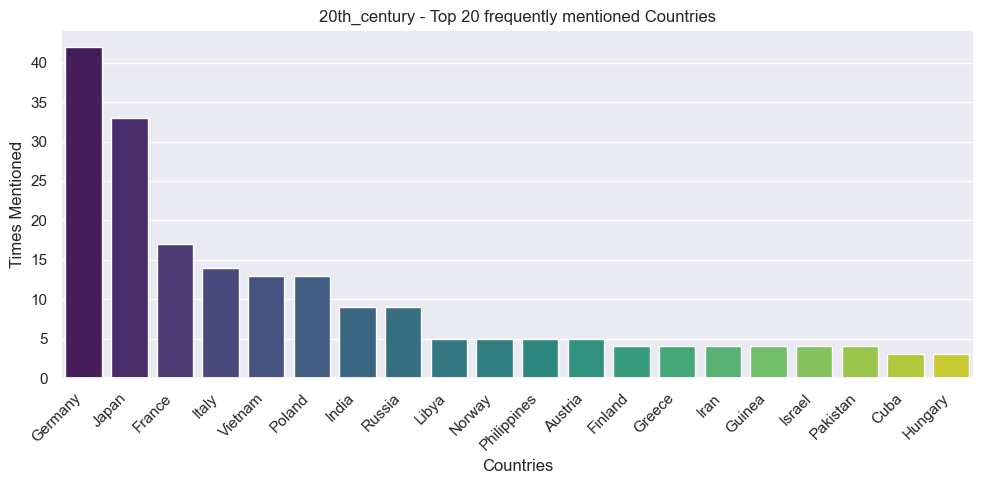

In [124]:
#Plot the top 20 countries 
plt.figure(figsize=(10, 5))
sns.barplot(data=top_countries, x='country_name', y='Times mentioned', palette='viridis')
plt.title('20th_century - Top 20 frequently mentioned Countries')
plt.xlabel('Countries')
plt.ylabel('Times Mentioned')
plt.xticks(rotation= 45, ha='right')
plt.tight_layout()
plt.show()


# Observations
- Germany is expected to be among the most mentioned countries as it played a significant role in the 20th century, being part of many key events during that time.
- It is surprising to see Russia ranked 8th among the most mentioned countries, given its prominent role in the 20th century.
- What stands out is the inclusion of the Philippines among the top 20 countries mentioned, which requires further investigation to understand the role it played during the 20th century.
- That being said, the United States did not make it to the list of the top 20 countries, which also warrants further investigation.

In [125]:
countries.to_csv("countries_20thCentury.csv")

## Sentiment Analysis

In [128]:
#Turn the object with tokenized sentence to TextBlob object
text_sent = TextBlob(str(filtered))

In [129]:
print(text_sent.sentiment)

Sentiment(polarity=0.04836183321711838, subjectivity=0.3544164986300048)


# Observations
- The polarity score is close to 0, indicating that the text is neither positive nor negative.
- The subjectivity is less moderate, suggesting that the text is likely focused more on factual events rather than personal opinions.